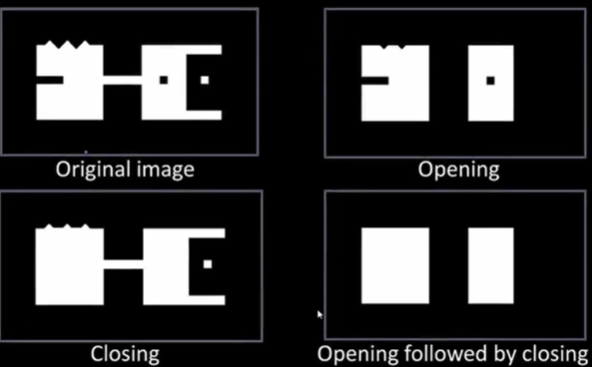

## Opening
* Brush inside shape → Removes small protrusions/islands outside
* open(src, ele) = dilate(erode(src, ele))

## Closing
* Brush outside shape → Fills small holes/pits inside
* close(src, ele) = erode(dilate(src, ele))

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

kernel
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


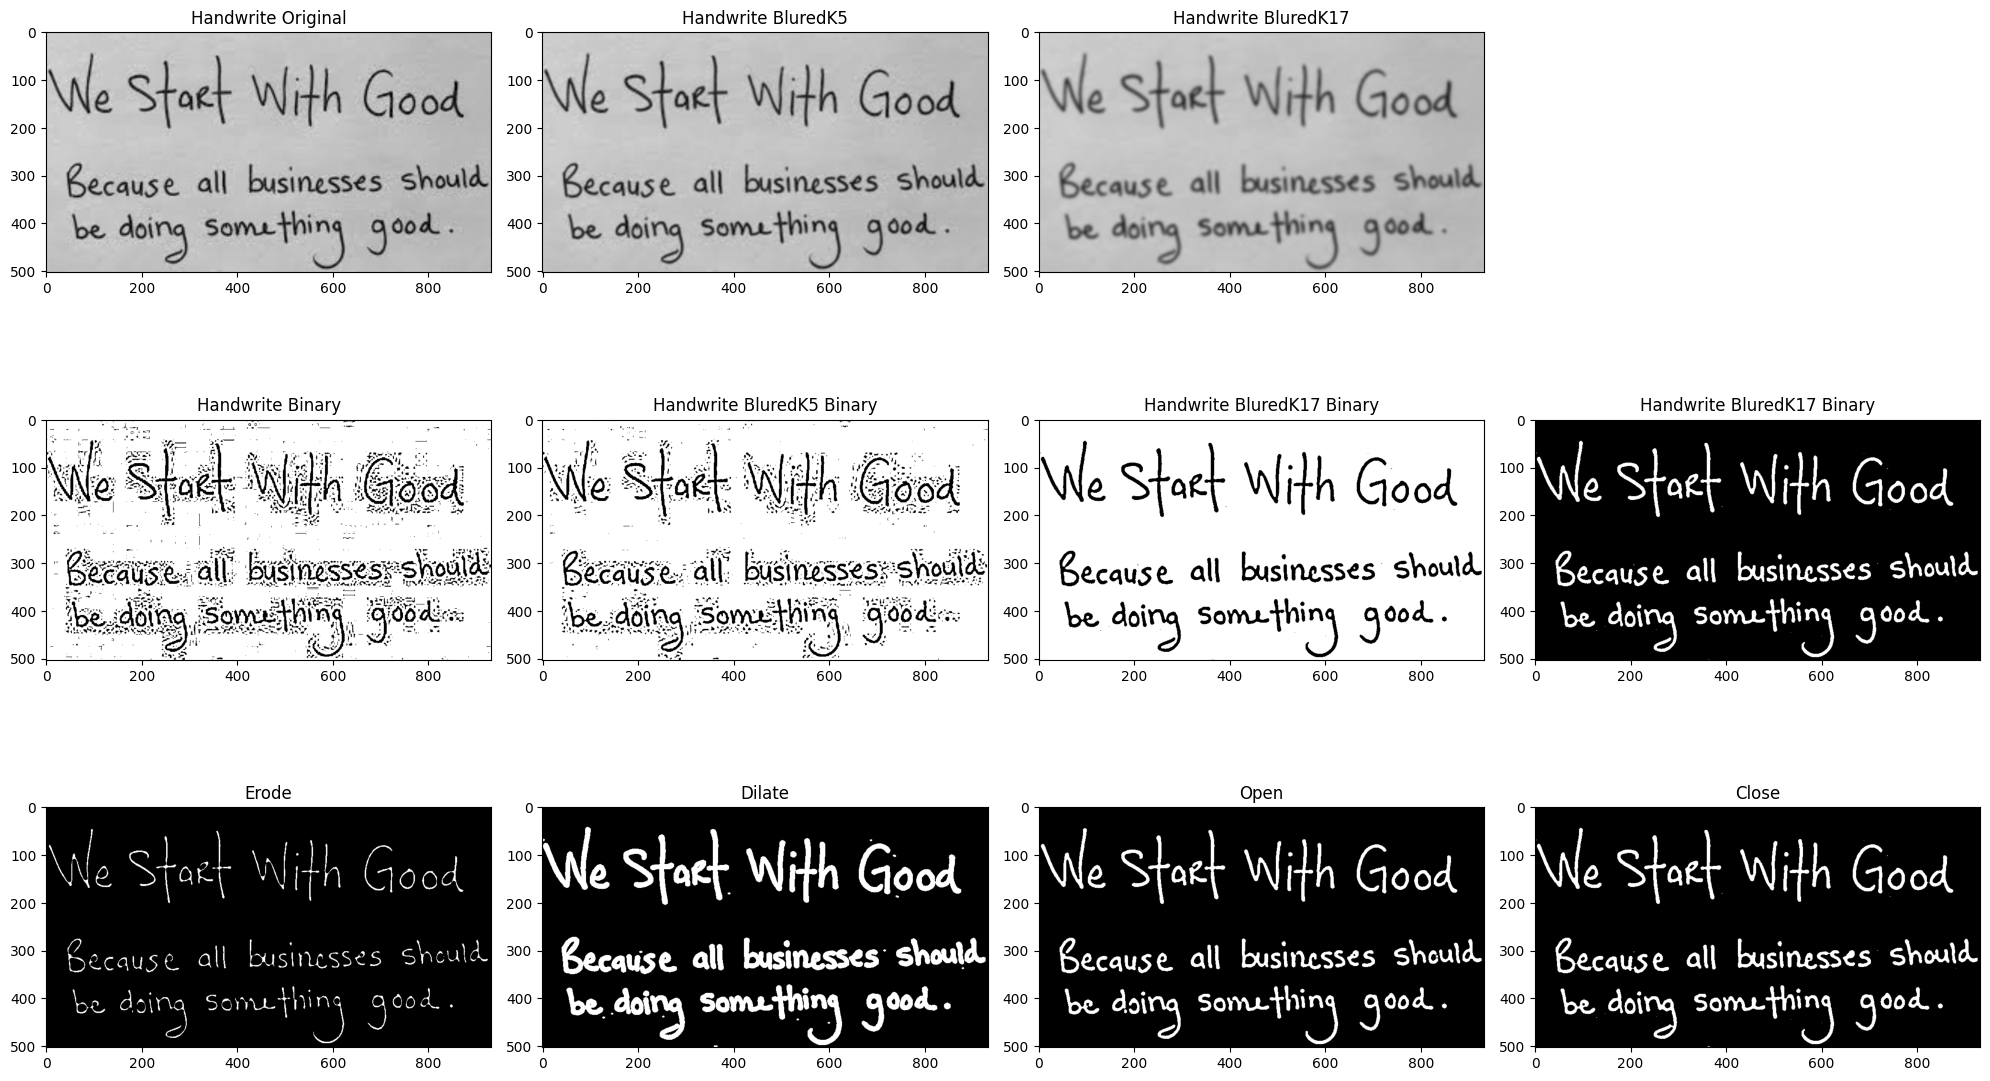

In [24]:
handwrite_img = cv.imread("../../images/handwrite.png", 0)

blured_handwrite_img_k5 = cv.GaussianBlur(handwrite_img, (5,5), 0)
blured_handwrite_img_k17 = cv.GaussianBlur(handwrite_img, (17,17), 0)
# images
plt.figure(figsize=(20,12))
plt.subplot(3,4,1); plt.imshow(handwrite_img, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite Original")
plt.subplot(3,4,2); plt.imshow(blured_handwrite_img_k5, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite BluredK5")
plt.subplot(3,4,3); plt.imshow(blured_handwrite_img_k17, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite BluredK17")

# Binary images
res = cv.adaptiveThreshold(handwrite_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.subplot(3,4,5); plt.imshow(res, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite Binary")
res = cv.adaptiveThreshold(blured_handwrite_img_k5, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.subplot(3,4,6); plt.imshow(res, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite BluredK5 Binary")
binary_handwrite_img = cv.adaptiveThreshold(blured_handwrite_img_k17, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.subplot(3,4,7); plt.imshow(binary_handwrite_img, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite BluredK17 Binary")
binary_handwrite_img = cv.bitwise_not(binary_handwrite_img)
plt.subplot(3,4,8); plt.imshow(binary_handwrite_img, cmap="gray", vmin=0, vmax=255); plt.title("Handwrite BluredK17 Binary")

# Opening and closing
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
print("kernel\n", kernel)

erodeRes = cv.erode(binary_handwrite_img, kernel)
plt.subplot(3,4,9); plt.imshow(erodeRes, cmap="gray", vmin=0, vmax=255); plt.title("Erode")
dilateRes = cv.dilate(binary_handwrite_img, kernel)
plt.subplot(3,4,10); plt.imshow(dilateRes, cmap="gray", vmin=0, vmax=255); plt.title("Dilate")
openRes = cv.morphologyEx(binary_handwrite_img, cv.MORPH_OPEN, kernel)
plt.subplot(3,4,11); plt.imshow(openRes, cmap="gray", vmin=0, vmax=255); plt.title("Open")
closeRes = cv.morphologyEx(binary_handwrite_img, cv.MORPH_CLOSE, kernel)
plt.subplot(3,4,12); plt.imshow(closeRes, cmap="gray", vmin=0, vmax=255); plt.title("Close")

cv.imwrite("../../images/handwrite-binary.png", binary_handwrite_img)
cv.imwrite("../../images/handwrite-binary-thin.png", erodeRes)
cv.imwrite("../../images/handwrite-binary-bold.png", dilateRes)

plt.tight_layout()

Text(0.5, 1.0, 'Close')

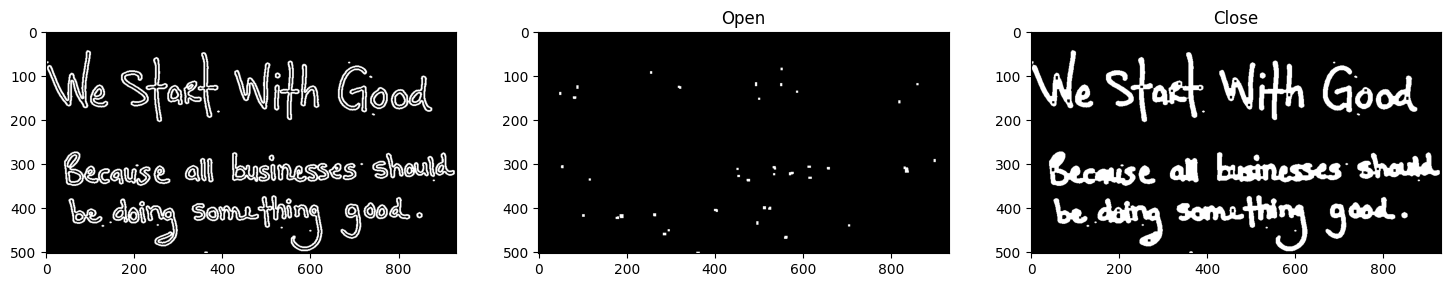

In [23]:
plt.figure(figsize=(18,4))
dilate_minus_erode = cv.subtract(dilateRes, erodeRes)
cv.imwrite("../../images/handwrite-binary-twoline.png", dilate_minus_erode)
plt.subplot(1,3,1); plt.imshow(dilate_minus_erode, cmap="gray", vmin=0, vmax=255)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
openRes = cv.morphologyEx(dilate_minus_erode, cv.MORPH_OPEN, kernel)
plt.subplot(1,3,2); plt.imshow(openRes, cmap="gray", vmin=0, vmax=255); plt.title("Open")
closeRes = cv.morphologyEx(dilate_minus_erode, cv.MORPH_CLOSE, kernel)
plt.subplot(1,3,3); plt.imshow(closeRes, cmap="gray", vmin=0, vmax=255); plt.title("Close")

Text(0.5, 1.0, 'Close')

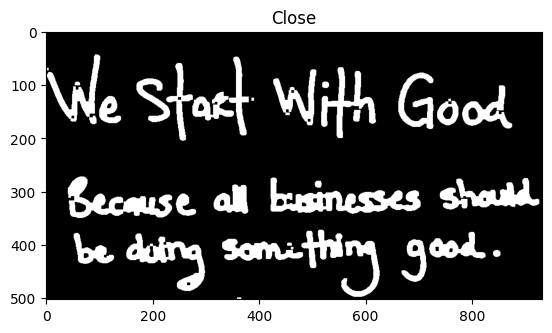

In [21]:
closeRes = cv.morphologyEx(closeRes, cv.MORPH_OPEN, kernel)
plt.imshow(closeRes, cmap="gray", vmin=0, vmax=255); plt.title("Close")